In [67]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [68]:
#define the transmission curve

def Tsymthru(wavelength, neff, abscoef_power, r, radius):
    phase=4*math.pi**2*radius*neff/wavelength
    round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom
def dB2Frac(dB):
    return 10**(dB/10)

In [69]:
#extract the data

Vp5_T= np.loadtxt("../RT-Transmission-Data/0.5V-RT-Data.csv", delimiter=",")
x = Vp5_T[:,0] 
y = Vp5_T[:,1]

In [70]:
#check for an weird points

print(y)

[0.98383764 0.97319156 0.95852519 0.94900243 0.93946066 0.92098091
 0.89823172 0.8783055  0.85582679 0.82715514 0.79537958 0.75975614
 0.7146098  0.66836317 0.62324766 0.58623391 0.54091014 0.47868758
 0.4188235  0.36566179 0.30840768 0.24927076 0.19109579 0.14065805
 0.09576481 0.06916143 0.05507729 0.07155648 0.12159083 0.18611376
 0.24396413 0.30303814 0.36160483 0.41789427 0.47257878 0.52192555
 0.57878875 0.64035999 0.68944908 0.72955455 0.76390204 0.79124353
 0.81459429 0.83739648 0.85842501 0.8750194  0.8865145  0.89379717
 0.90263179 0.90671554 0.91130604 0.91333425 0.9178801  0.91934449]


In [71]:
#remove any weird outliers from the data extraction

x = x[:-1]
y = y[:-1]

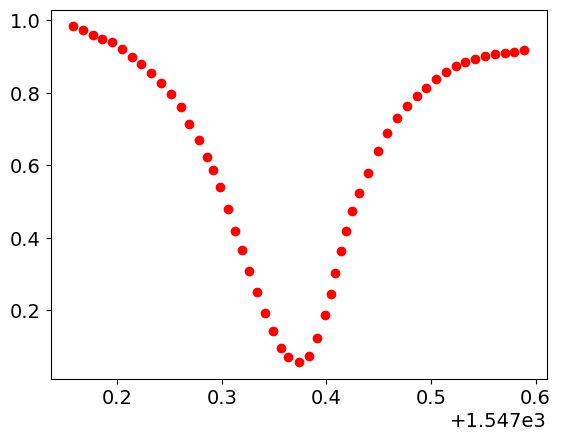

In [72]:
plt.plot(x, y, 'ro', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [73]:
#define the radius and r values

def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power, 0.99125, 10e-6)

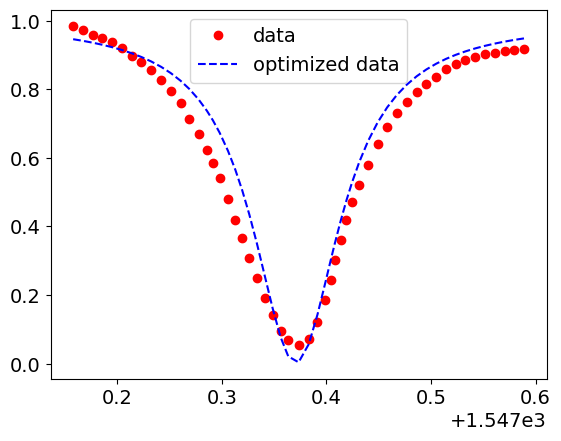

In [74]:
#plot a guess to make sure the neff value works
new_x = np.linspace(1540, 1550, 100)
ans = Guess(x*1e-9,2.167191,298)

plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [75]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[2.167191,292.5]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x*1e-9,y,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[  2.16718742 440.66923841]
 [  2.16718742 440.68844814]
 [  2.16718742 440.68282358]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742 440.6855955 ]
 [  2.16718742

In [76]:
fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])

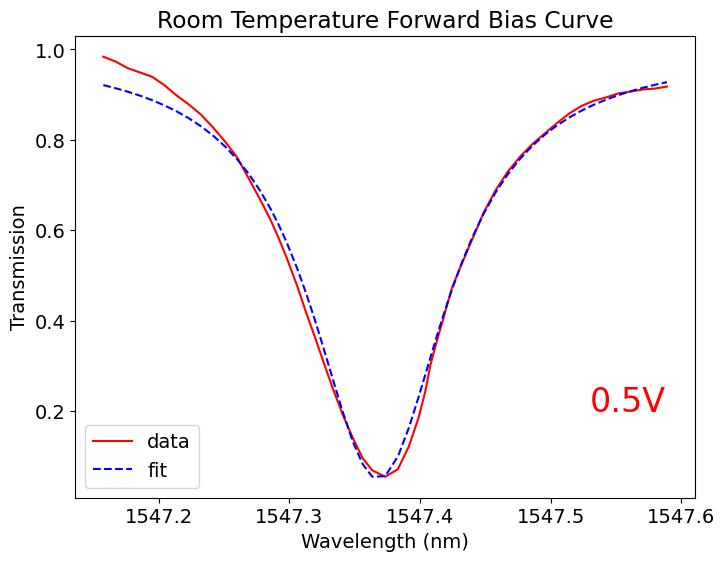

In [77]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.plot(x, y, '-', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
plt.title('Room Temperature Forward Bias Curve')
plt.ticklabel_format(useOffset=False)
plt.text(1547.53, 0.2, r'0.5V', color = "red", fontsize="24")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')

plt.legend()
plt.savefig("RT0.5V.png")
plt.show()